# Dependencies

In [22]:
import json
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Twitter API Keys
consumer_key = "TMmoNF4ShPaG4MpftsiHGbx50"
consumer_secret = "S4yUU9Efd3ZTS7B7j3tyPcRf2QYIZtyiAGJ3pTmU7D7fiecROy"
access_token = "503080507-mGl2xweaoTaAnkleYsXWQL4vIKwHe6tPdhMbXMbx"
access_token_secret = "jm9HkG3SLrSjho5I4lanfCaZX8MVtO0bcI1RWbRcWiDWi"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# Combine data and get top 20


In [116]:
twitter_act = '../unique_users.csv'
screen_name = pd.read_csv(twitter_act)

racist1 = pd.read_csv('short_follower_frequency150.csv')
racist2 = pd.read_csv('short_follower_frequency300.csv')
racist3 = pd.read_csv('short_follower_frequency450.csv')
racist4 = pd.read_csv('short_follower_frequency600.csv')
racist5 = pd.read_csv('short_follower_frequency750.csv')
racist6 = pd.read_csv('short_follower_frequencyRest.csv')

frames = [racist1, racist2, racist3, racist4, racist5, racist6]

everything = pd.concat(frames)

everything.columns = [
  'screen name',
  'mutual count'
]

#Top 20 .. top 50
twenty = everything.groupby('screen name').sum().sort_values('mutual count', ascending=False).iloc[0:20]
condensed = everything.groupby('screen name').sum().sort_values('mutual count', ascending=False).iloc[0:50]

#100 -- just to take a look
full = everything.groupby('screen name').sum().sort_values('mutual count', ascending=False).iloc[0:100]
full.head()


,mutual count
screen name,
25073877,423
822215679726100480,339
196168350,227
16589206,225
78523300,223


# Data Frame: Top 50

In [117]:
topFollowers = pd.DataFrame(
        {   "User": [x for x in condensed.index[0:50]],
            "Follower Count": [x for x in condensed["mutual count"][0:50]],
            
        }
    )
topFollowers[["User", "Follower Count"]] 
new_topFollowers = topFollowers.set_index(['User'])

del new_topFollowers.index.name

new_topFollowers

# most popular from following lists
new_topFollowers.to_csv('mutual_followers.csv')

# Data Frame: Top 20

In [118]:
topFollowers20 = pd.DataFrame(
        {   "User": [x for x in twenty.index],
            "Follower Count": [x for x in twenty["mutual count"]],
            
        }
    )
topFollowers20[["User", "Follower Count"]] 
new_topFollowers20 = topFollowers20.set_index(['User'])

del new_topFollowers20.index.name

new_topFollowers20

# # most popular from following lists
# new_topFollowers20.to_csv('mutual_followers20.csv')

,Follower Count
25073877,423
822215679726100480,339
196168350,227
16589206,225
78523300,223
22703645,220
41634520,214
818876014390603776,213
471672239,207
822215673812119553,203


# Convert IDs to Screen Name for Top 20

In [123]:
screennames20 = []

for name in new_topFollowers20.index:
    # convert the twitter id to a screen name by inputing ID into .get_user api
    screen_name_from_id = api.get_user(name)

#     print(screen_name_from_id["screen_name"])
    screennames20.append(screen_name_from_id["screen_name"])
    
new_topFollowers20["Twitter Name"] = [x for x in screennames20]
    


new_topFollowers20

,Follower Count,Twitter Name
25073877,423,realDonaldTrump
822215679726100480,339,POTUS
196168350,227,AnnCoulter
16589206,225,wikileaks
78523300,223,RealJamesWoods
22703645,220,TuckerCarlson
41634520,214,seanhannity
818876014390603776,213,FLOTUS
471672239,207,KellyannePolls
822215673812119553,203,WhiteHouse


# Convert IDs to Screen Name for Top 50

In [6]:
screennames50 = []

for name in new_topFollowers.index:
    # convert the twitter id to a screen name by inputing ID into .get_user api
    screen_name_from_id = api.get_user(name)

#     print(screen_name_from_id["screen_name"])
    screennames50.append(screen_name_from_id["screen_name"])
    
new_topFollowers["Twitter Name"] = [x for x in screennames50]
    
new_topFollowers.head()



,Follower Count,Twitter Name
25073877,423,realDonaldTrump
822215679726100480,339,POTUS
196168350,227,AnnCoulter
16589206,225,wikileaks
78523300,223,RealJamesWoods


# Data Frame: Top 100

In [5]:
hunFollowers = pd.DataFrame(
        {   "User": [x for x in full.index[0:100]],
            "Follower Count": [x for x in full["mutual count"][0:100]],
            
        }
    )
hunFollowers[["User", "Follower Count"]] 
new_hunFollowers = hunFollowers.set_index(['User'])

del new_hunFollowers.index.name


# most popular from following lists
new_hunFollowers.to_csv('top_hundred.csv')

new_hunFollowers.head()

,Follower Count
25073877,423
822215679726100480,339
196168350,227
16589206,225
78523300,223


# Convert IDs to Screen Name for Top 100

In [16]:
screennames100 = []

for hun in new_hunFollowers.index:
    try:
        # convert the twitter id to a screen name by inputing ID into .get_user api
        screen_name_from_id_100 = api.get_user(hun)
        
        screennames100.append(screen_name_from_id_100["screen_name"])
    except:
        hun = "ChristieC733" #this users profile was deleted recently, but thanks to google we could id
        screennames100.append(hun)
        print('error on: ' + str(hun))
        

hunFollowers["Twitter Name"] = [x for x in screennames100]
    
# new_hunFollowers.head()

# new_hunFollowers = new_hunFollowers.set_index(['Twitter Name'])

# del new_hunFollowers.index.name

hunFollowers.set_index(["Twitter Name"], inplace=True)

hunFollowers.head()

error on: ChristieC733


,Follower Count,User
Twitter Name,,
realDonaldTrump,423,25073877
POTUS,339,822215679726100480
AnnCoulter,227,196168350
wikileaks,225,16589206
RealJamesWoods,223,78523300


# Convert user Ids of newsTwitter list to their user ID

In [8]:
#News & Celebrity Sources
newsTwitter = ['reuters', 'nytimes','washingtonpost', 'buzzfeednews',
        'cnn','realdonaldtrump', 'berniesanders','hillaryclinton',
        'foxnews', 'breitbartnews','seanhannity', 'mike_pence', 'richardbspencer',
          'GlennBeck', 'rnc', 'tomilahren', 'espn', 'npr','KimKardashian']

# Put screen names ID's here
newsIds = []

# loop through screen names given
for name in newsTwitter:
    try:
        # targets given name in the screen names list
        followers_id = api.get_user(name)
        
        newsIds.append(followers_id['id'])
    except:  
        print('error on: ' + str(name))

newsIds


[1652541,
 807095,
 2467791,
 1020058453,
 759251,
 25073877,
 216776631,
 1339835893,
 1367531,
 457984599,
 41634520,
 22203756,
 402181258,
 17454769,
 529648439,
 468646961,
 2557521,
 5392522,
 25365536]

# Create DF that combines the news source with it's ID

In [9]:
newsDf = pd.DataFrame(
        {   "User": [x for x in newsTwitter],
            "ID": [x for x in newsIds],
            
        }
    )
newsDf[["User", "ID"]] 
new_newsDf = newsDf.set_index(['User'])

del new_newsDf.index.name

new_newsDf.head()

,ID
reuters,1652541
nytimes,807095
washingtonpost,2467791
buzzfeednews,1020058453
cnn,759251


# Let's see if our users follow these sources

In [137]:
#News Sources
newsTwitter = ['reuters', 'nytimes','washingtonpost', 'buzzfeednews',
        'cnn','realdonaldtrump', 'berniesanders','hillaryclinton',
        'foxnews', 'breitbartnews','seanhannity', 'mike_pence', 'richardbspencer',
          'GlennBeck', 'rnc', 'tomilahren', 'espn', 'npr', 'kimkardashian']

# put results of news matching
newsMatch = []

for x in hunFollowers.index:
    # if one of the names matches something in our list of news sources:
    if x.lower() in newsTwitter:
        newsMatch.append(x)
        

matches = hunFollowers.loc[newsMatch]
matches.to_csv('News_Following.csv')

matches


,Follower Count,User
Twitter Name,,
realDonaldTrump,423,25073877
seanhannity,214,41634520
BreitbartNews,191,457984599
mike_pence,184,22203756
FoxNews,171,1367531
nytimes,144,807095
HillaryClinton,132,1339835893
CNN,131,759251
Reuters,131,1652541


# Visualizations

## Bar Chart to show those who followed specific news sources

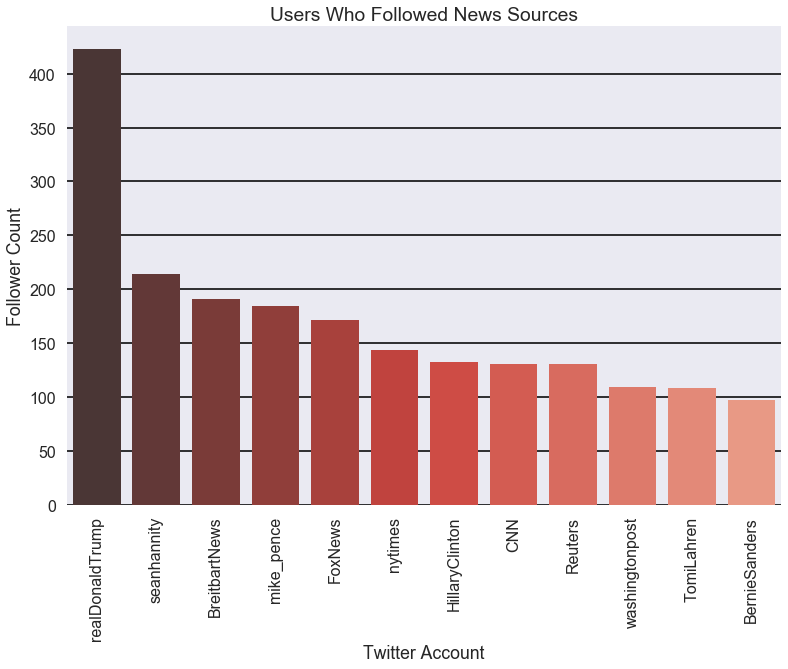

In [131]:
sns.set_style("darkgrid", { 'grid.color': '.02'})
plt.xticks(rotation=90)
ax = sns.barplot(matches.index, y="Follower Count", data=matches, palette="Reds_d")
ax.set_ylabel('Follower Count')
ax.set_xlabel('Twitter Account')
ax.set_title('Users Who Followed News Sources')

plt.show()


## Horizontal Bar Chart of Top 20 Mutual Followers

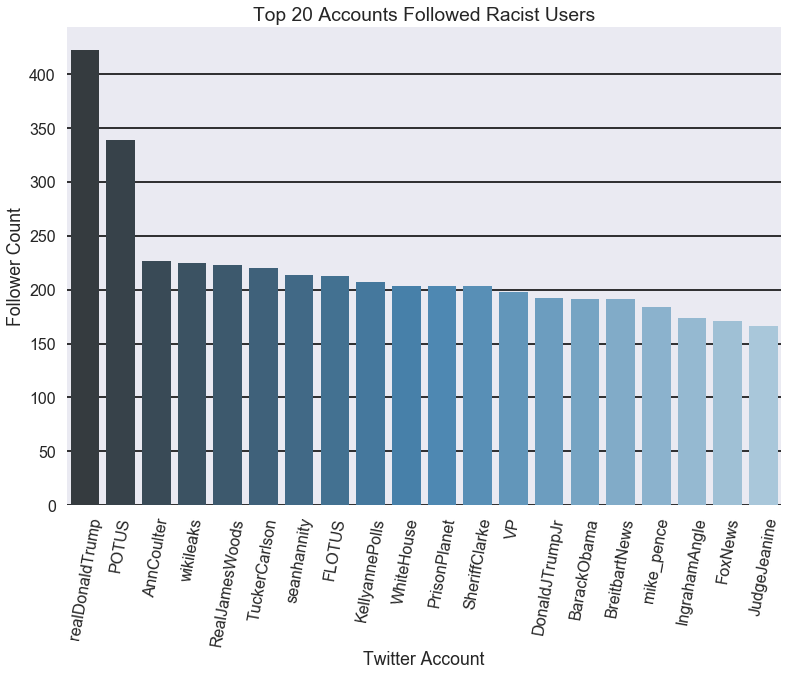

In [129]:
sns.set_style("darkgrid", { 'grid.color': '.02'})
plt.xticks(rotation=80)
ax = sns.barplot("Twitter Name", y="Follower Count", data=new_topFollowers20, palette="Blues_d")
ax.set_ylabel('Follower Count')
ax.set_xlabel('Twitter Account')
ax.set_title('Top 20 Accounts Followed Racist Users')

plt.show()